In [7]:
import numpy as np
import matplotlib.pyplot as plt

R_J_mol=8.3144621 #Universal gas constant in units of J K**-1 mol**-1
mu_SO2 = 64.07 # https://pubchem.ncbi.nlm.nih.gov/compound/Sulfur-dioxide
mu_H2S = 34.08 # https://pubchem.ncbi.nlm.nih.gov/compound/402
mu_magma=64.52 #Table 1 of Wogan+2020
x_FeO=0.091 #
def x_SO2_m_lesne_2015(f_SO2):
    """
    Described in Section 4.2 of Lesne+2015. Key assumption made: the SO2 dissolves as SULFATE (SO4[2-]). This means that it really corresponds to an oxidized melt. 
    
    
    f_SO2 is in bar
    """
    k_h = 0.109*1E6 #bar. Specific to basalt, and 1200 C
    x_SO2_m=f_SO2/k_h #mol fraction of so2 in melt
    
    return x_SO2_m

def x_H2S_m_lesne_2015(f_H2S, T, x_FeO):
    """
    Described in Section 4.2 of Lesne+2015. Key assumption: the H2S dissolves as SULFIDE (S[2-]). This means that it really corresponds to a reduced melt.
    
    
    f_H2S is in bar
    T is in k. 
    x_FeO is molar fraction of FeO of the melt. But, a bit confused: is this mols of FeO/mols of magma, or is it mols of FeO/mols of (FeO + Fe2O3)??? From defition of mol fraction it must be the former...perhaps the text in Lesne+2015 (top left of pg. 113) is just unclearly stated, i.e. that from the one quantity you can get the other?
    """
    k_h = -1323947.1948*x_FeO + 158611.19322 #bar. Specific to basalt  #Eqn 21
    deltaH=-2590400.8*x_FeO + 75571.8 #J/mol #eqn 22
    T_r=1050+273.15 #T_0 is specific bottom of left column of pg 112. It is specified in C, but incorporation into thermo means it must be converted to K, AFAIK. 
    
    x_H2S_m = (f_H2S/k_h) * np.exp(-(deltaH/R_J_mol)*(1/T-1/T_r)) #eqn 20
    
    return x_H2S_m

def x_SO2_m_burgisser_2015(f_SO2):
    """
    Calibrated range (from Table 2 of Burgisser+2015):
        delta NNO = +2 [oxidizing]
        250-2000 bar total pressure
        54-2975 bar FUGACITY of SO2 [hence >2000???]
        1050-1200 C
        0.52-3.85 wt % H2O
        7.62-10.46 wt % FeO*
        ...and other parameters, but my reading suggests the above are the most important [perhaps others are important in other ranges?]
    
    ASSUME f_SO2 to be in bar, and output to be weight fraction [absolute, not ppm]
    """
    w_SO2_m=2.376E-3 * f_SO2**0.1967
    x_SO2_m=w_SO2_m*mu_magma/mu_SO2
    return x_SO2_m

def x_H2S_m_burgisser_2015(f_H2S):
    """
    Calibrated range (from Table 2 of Burgisser+2015):
        delta NNO = -1 to -0.3 [oxidizing]
        1000-2000 bar total pressure
        28-1159 bar FUGACITY of SO2 [hence >2000???]
        1050-1250 C
        1.70-4.84 wt % H2O
        7.62-10.46 wt % FeO*
        ...and other parameters, but my reading suggests the above are the most important [perhaps others are important in other ranges?]
    
    ASSUME f_H2S to be in bar, and output to be weight fraction [absolute, not ppm]
    """
    w_H2S_m=4.623E-4 * f_H2S**0.2627
    x_H2S_m=w_H2S_m*mu_magma/mu_H2S
    return x_H2S_m

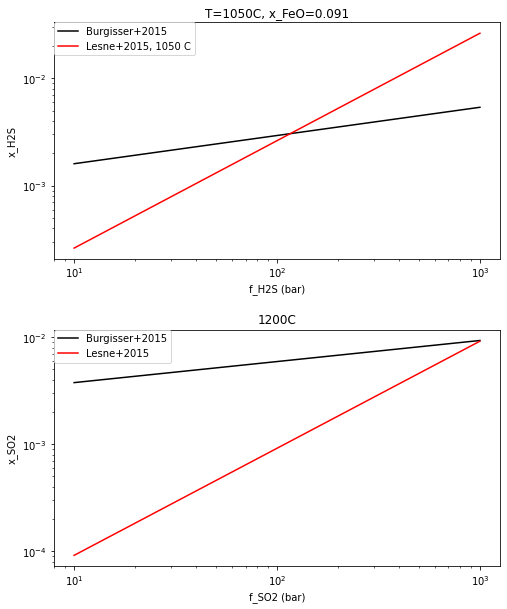

In [9]:
f_H2S_bar_list=np.logspace(1.0, 3.0, num=30)
f_SO2_bar_list=np.logspace(1.0, 3.0, num=30)
    
    
fig, ax=plt.subplots(2, figsize=(8., 10.))
ax[0].set_title('T=1050C, x_FeO=0.091')
ax[0].plot(f_H2S_bar_list, x_H2S_m_burgisser_2015(f_H2S_bar_list), color='black', label='Burgisser+2015')
ax[0].plot(f_H2S_bar_list, x_H2S_m_lesne_2015(f_H2S_bar_list, (273.+1050.), x_FeO), color='red', label='Lesne+2015, 1050 C') #Should be best at 1050C
ax[1].set_title('1200C')
ax[1].plot(f_SO2_bar_list, x_SO2_m_burgisser_2015(f_SO2_bar_list), color='black', label='Burgisser+2015')
ax[1].plot(f_SO2_bar_list, x_SO2_m_lesne_2015(f_SO2_bar_list), color='red', label='Lesne+2015')
    
for ind in range(0, 2):
    ax[ind].set_yscale('log')
    ax[ind].set_xscale('log')
    ax[ind].legend(loc='best', ncol=1, borderaxespad=0., fontsize=10)
    
ax[0].set_ylabel('x_H2S')
ax[1].set_ylabel('x_SO2')
ax[0].set_xlabel('f_H2S (bar)')
ax[1].set_xlabel('f_SO2 (bar)')
plt.subplots_adjust(hspace=0.3)